In [9]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("datasets/haberman.csv")
df.head(2)

,age,op_year,lymph_nodes,survival
0,30,64,1,1
1,30,62,3,1


In [58]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# replace classes 1,2 with 0,1
class_labels = {1:0,2:1}
y = np.array(list(map(lambda x: class_labels[x],list(y))))

print(len(X)," : ",len(y))

306  :  306


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [80]:
clf = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
y_pred_test = clf.predict_proba(X_test)
y_pred_train = clf.predict_proba(X_train)
print(y_pred[0])
# y_pred = [ [p(class=0),p(class=1)] ]

0.6956521739130435
[0.9 0.1]


In [81]:
roc_test = roc_auc_score(y_test,y_pred_test[:,-1])
roc_train = roc_auc_score(y_train,y_pred_train[:,-1])
print("AUC Score for Train Data %f" % roc_train)
print("AUC Score for Test Data %f" % roc_test)

AUC Score for Train Data 0.823957
AUC Score for Test Data 0.638403


### Selecting Best Threshold for classification

In [85]:
#Class labels should be 0 or 1 only
#Calculate ROC Curve
fpr, tpr, threshold = roc_curve(y_test,y_pred_test[:,-1])

In [86]:
# Threshold values chosen by ROC Curve
threshold

array([1.7, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

### Calculate accuracy for each threshold

In [84]:
for thresh in threshold:
    pred = list()
    for x in y_pred_test[:,-1]:
        if x > thresh:
            pred.append(1)
        else:
            pred.append(0)
    pred = np.array(pred)
    acc = accuracy_score(y_test, pred)
    print("Accuracy with Threshold %.2f : %.2f" % (thresh, acc))

Accuracy with Threshold 1.70 : 0.72
Accuracy with Threshold 0.70 : 0.72
Accuracy with Threshold 0.60 : 0.71
Accuracy with Threshold 0.50 : 0.70
Accuracy with Threshold 0.40 : 0.67
Accuracy with Threshold 0.30 : 0.66
Accuracy with Threshold 0.20 : 0.64
Accuracy with Threshold 0.10 : 0.59
Accuracy with Threshold 0.00 : 0.46


###  Plot

Text(0, 0.5, 'TPR')

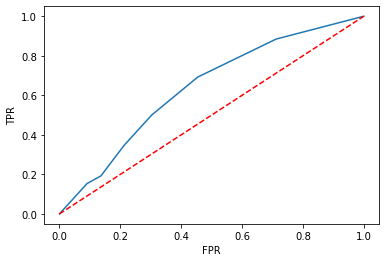

In [96]:
diagonal = np.linspace(0.0,1.0,9)
plt.plot(fpr,tpr)
plt.plot(diagonal,diagonal,'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")